This is the Kalman Filter lab. 

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pylab

In [2]:
class KalmanFilter(object):
    
    """F is a (n,n) matrix acting as the state transition model
       Q is a (n,n) matrix acting as the covariance matrix for state noise
       H is a (m,n) matrix acting as the observation model
       R is a (n,n) matrix acting as the covariance matrix for observation noise
       u is a n-dimensional vector acting as control vector
       
       We assume B, the control matrix, to be the identity matrix
       
       the command 'pass' acts as a placeholder, it allows to write code without running it. """
    
    def __init__(self, F, Q, H, R, u):
        self.transition=F
        self.covar_state=Q
        self.obs=H
        self.covar_obs=R
        self.control=u       
        
        """To plot the evolution of the trajectory over time, we use the linear model
        
           x_k+1 = F_k * x_k  + u_k  +w_k    and 
           z_k+1 = H_k * x_k  +v_k"""
    def evolve(self, x_old, epochs):
        states=np.asarray(x_old)
        obs=[0, 0]
        
        for i in range(0, epochs):
            x_new=np.dot(F, x_old) + u + np.random.multivariate_normal(np.zeros(4), Q)
            z_new=np.dot(H, x_old) + np.random.multivariate_normal(np.zeros(2), R)     
            
            states=np.c_[states, x_new]
            obs=np.c_[obs, z_new]
        
            x_old=x_new

        %matplotlib inline
        plt.plot(states[0], states[1])
        plt.title('State')
        plt.show()
        
        %matplotlib inline
        plt.plot(obs[0], obs[1])
        plt.title('Obs')
        plt.show()
        
        return states, obs
    
        
    def estimate(self, x, P, z):
        x_state=x
        out=x_state
        P_state=P
        N= 600
        i=0
        
        for i in range(N):
            z_k=z[:, i] 
            #Predict Step of Kalman Filter
            x_est=np.dot(F, x_state)+u
            #print('estimate is  ', x_est[1])
            P_est=np.dot(np.dot(F, P_state), np.asarray(F).transpose())+Q

            #Update step
            y_k=z_k -np.dot(H, x_est)
            S_k=np.dot(np.dot(H, P_est), np.asarray(H).transpose())+R
            K_k=np.dot(np.dot(P_est, np.asarray(H).transpose()), inv(S_k))
            
            x_state=x_est + np.dot(K_k, y_k)
            #print('state is  ', x_state[1])
            prod=np.dot(K_k, H)
            P_state=np.dot((np.identity(len(prod))-prod), P_est)

            out=np.c_[out, x_est]
            i+=1
            
        return(out)     
    
    
    
    def predict(self, x, k):
        pred=x
        x_old=x
        for i in range(0, k):
            x_new=np.dot(F, x_old)+u
            x_old=x_new
            pred=np.c_[pred, x_old]
        
        return pred
    
    
    def rewind(self, x, k):
        pred=x
        x_old=x
        for i in range(0, k):
            x_new=np.dot(inv(F), x_old-u)
            pred=np.c_[pred, x_new]
            x_old=x_new
        
        return pred

In [3]:
#Initialize Parameters
F=[[1,0,0.1, 0], [0, 1, 0, 0.1], [0, 0, 1, 0], [0, 0, 0, 1]]
H=[[1, 0, 0, 0], [0, 1, 0, 0]]
u=[0, 0, 0, -0.98]
Q=0.1*np.identity(4)
R=5000*np.identity(2)
x_init=[0, 0, 300, 600]
epochs=1250

#Instantiate class
x=KalmanFilter(F, Q, H, R, u)

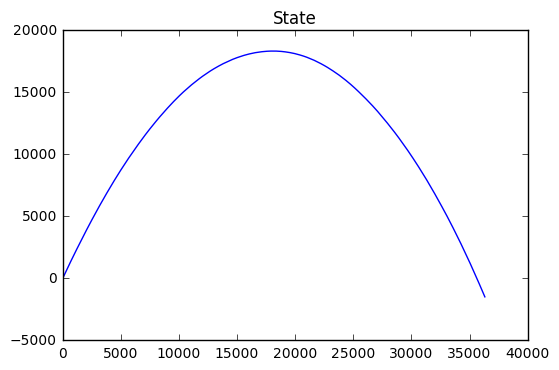

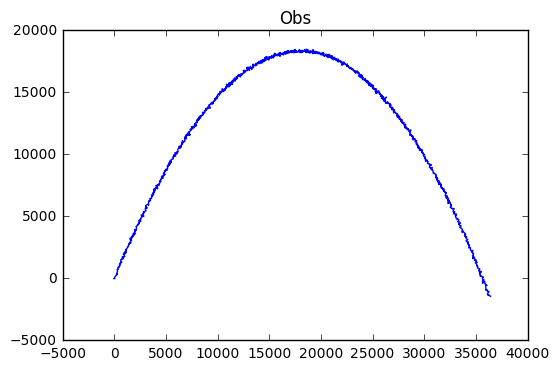

In [4]:
states, obs=x.evolve(x_init, epochs)

In [5]:
x_in=[states[0][200], states[1][200], np.average(10*np.diff(obs[0][200:209])), np.average(10*np.diff(obs[1][200:209]))]
P_in=1000000*Q

In [6]:
estimates=x.estimate(x_in, P_in, obs[:, 201:])

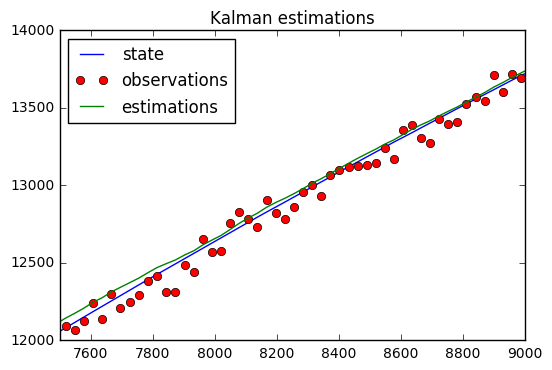

In [7]:
%matplotlib inline
x_axis=states[0][199:800]
plt.plot(x_axis, states[1][199:800] , 'b', label='state')
plt.plot(x_axis, obs[1][199:800], 'ro' , label='observations')
plt.plot(x_axis, estimates[1], 'g', label='estimations' )
pylab.ylim([12000, 14000])
pylab.xlim([7500, 9000])
plt.title('Kalman estimations')
plt.legend(loc=0)
plt.show()

In [8]:
x_feed=[estimates[0][600], estimates[1][600], estimates[2][600], estimates[3][600]]
pred_no_obs=x.predict( x_feed, 450)

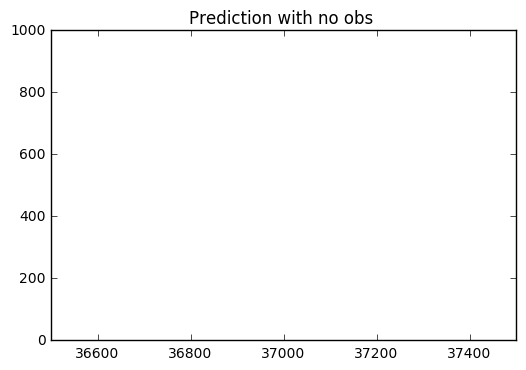

In [9]:
%matplotlib inline
plt.plot(pred_no_obs[0], pred_no_obs[1], 'b')
plt.plot(states[0][800:1250], states[1][800:1250], 'r')
plt.title('Prediction with no obs ')
pylab.xlim([36500, 37500])
pylab.ylim([0, 1000])
plt.show()

In [10]:
x_0=states[:, 250]

In [11]:
rew=x.rewind(x_0, 252)

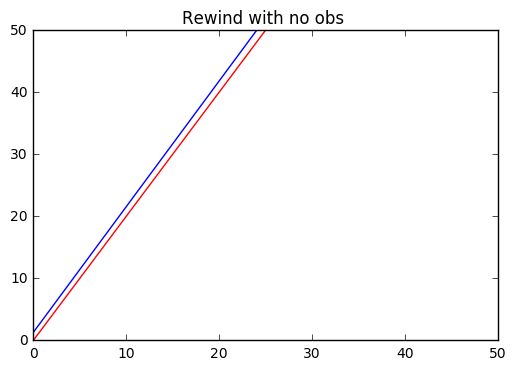

In [15]:
%matplotlib inline
plt.plot(rew[0], rew[1],  'b')
plt.plot(states[0], states[1], 'r')
plt.title('Rewind with no obs ')
pylab.xlim([0, 50])
pylab.ylim([0, 50])
plt.show()